## Netflix Analysis
### Phase 3 :EDA (Exploratory Data Analysis)
### Name : Gagan Dhanapune
### gmail : gagandhanapune@gmail.com

### Objective Of This Milestone 
##### •	Analyze Netflix content growth over time.
##### •	Visualize the distribution of genres, ratings, and content type.
##### •	Identify country-level content contributions.
##### •	Create derived features such as “Content Length Category” and “Original vs. Licensed” (if derivable from dataset).


06/10/2025

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv("/Volumes/workspace/default/netflix/netflix_cleaned_new.csv")

In [0]:
df.isnull().sum()

show_id             0
type                0
title               0
director         2634
cast              825
country           831
date_added         10
release_year        0
rating              4
listed_in           0
description         0
duration_num        0
duration_type       3
dtype: int64

In [0]:
df.fillna('NA', inplace=True)

In [0]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_num,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Season
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NA,"September 24, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,NA,NA,NA,"September 24, 2021",2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Season


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        8807 non-null   object 
 1   type           8807 non-null   object 
 2   title          8807 non-null   object 
 3   director       8807 non-null   object 
 4   cast           8807 non-null   object 
 5   country        8807 non-null   object 
 6   date_added     8807 non-null   object 
 7   release_year   8807 non-null   int64  
 8   rating         8807 non-null   object 
 9   listed_in      8807 non-null   object 
 10  description    8807 non-null   object 
 11  duration_num   8807 non-null   float64
 12  duration_type  8807 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 894.6+ KB


In [0]:
df.shape

(8807, 13)

In [0]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
listed_in        0
description      0
duration_num     0
duration_type    0
dtype: int64

In [0]:
df.describe()

,release_year,duration_num
count,8807.000000,8807.000000
mean,2014.180198,69.823095
std,8.819312,50.822520
min,1925.000000,0.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2019.000000,106.000000
max,2021.000000,312.000000


In [0]:
df.count()

show_id          8807
type             8807
title            8807
director         8807
cast             8807
country          8807
date_added       8807
release_year     8807
rating           8807
listed_in        8807
description      8807
duration_num     8807
duration_type    8807
dtype: int64

08/10/2025


### Univariate Analysis

/home/spark-11539e4d-4771-4ce2-bf2c-b5/.ipykernel/2441/command-6550923978183586-429966062:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


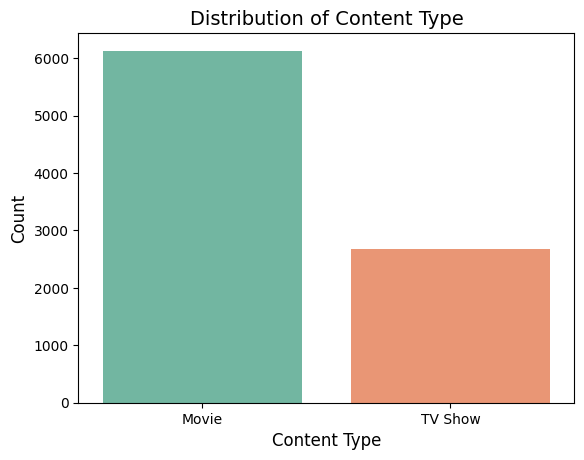

In [0]:
sns.countplot(x='type', data=df, palette='Set2') 
plt.title("Distribution of Content Type", fontsize=14)
plt.xlabel("Content Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

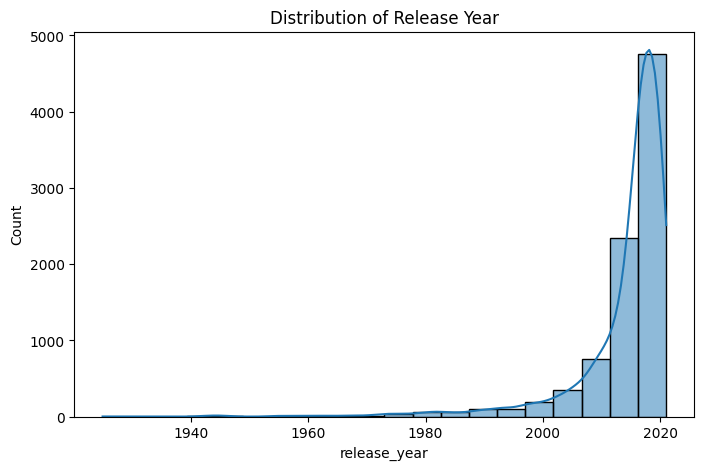

In [0]:
plt.figure(figsize=(8, 5))
sns.histplot(
    df['release_year'],
    bins=20,
    kde=True,
    element='bars'
)
plt.title("Distribution of Release Year")
plt.show()

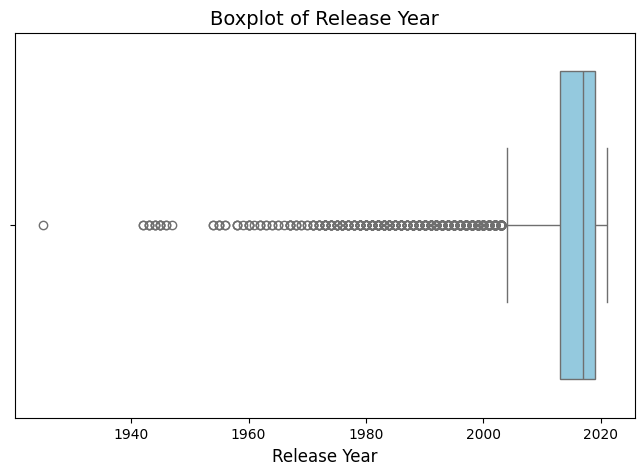

In [0]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['release_year'], color='skyblue') 
plt.title("Boxplot of Release Year", fontsize=14)
plt.xlabel("Release Year", fontsize=12)
plt.show()

# Most Netflix content was released after 2000, with a sharp increase after 2010.

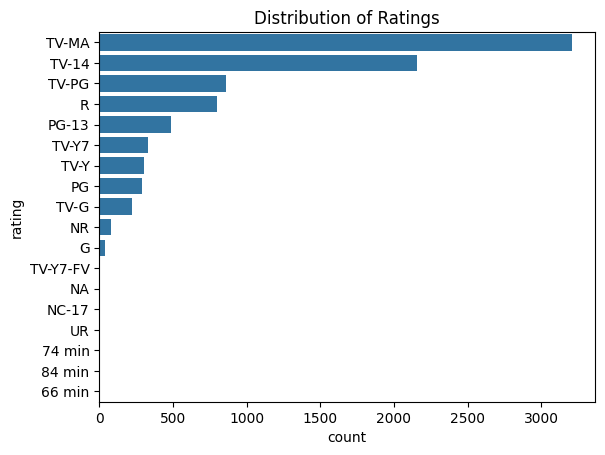

In [0]:
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title("Distribution of Ratings")
plt.show()


09/10/2025


### Bivariate Analysis

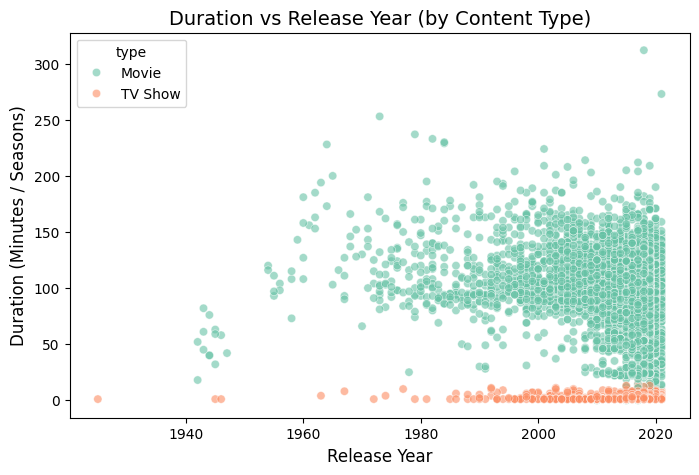

In [0]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='release_year', y='duration_num', hue='type', data=df, alpha=0.6, palette='Set2')
plt.title("Duration vs Release Year (by Content Type)", fontsize=14)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Duration (Minutes / Seasons)", fontsize=12)
plt.show()

/home/spark-11539e4d-4771-4ce2-bf2c-b5/.ipykernel/2441/command-6550923978183584-850929226:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='type', y='duration_num', data=df, ci=None)


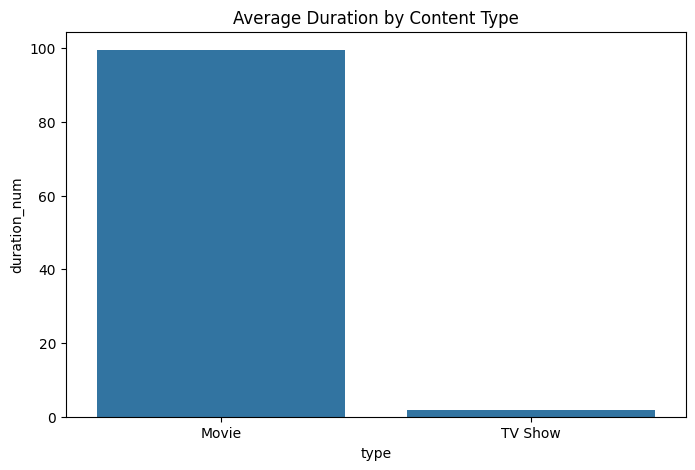

In [0]:
plt.figure(figsize=(8,5))
sns.barplot(x='type', y='duration_num', data=df, ci=None)
plt.title("Average Duration by Content Type")
plt.show()

10/10/2025


<Figure size 1200x600 with 0 Axes>

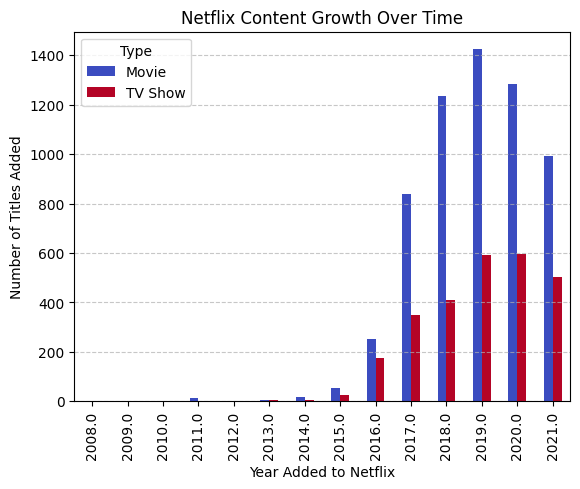

In [0]:
# Plotting the growth
plt.figure(figsize=(12,6))
content_growth.plot(kind='bar', stacked=False, colormap='coolwarm')
plt.title("Netflix Content Growth Over Time")
plt.xlabel("Year Added to Netflix")
plt.ylabel("Number of Titles Added")
plt.legend(title='Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


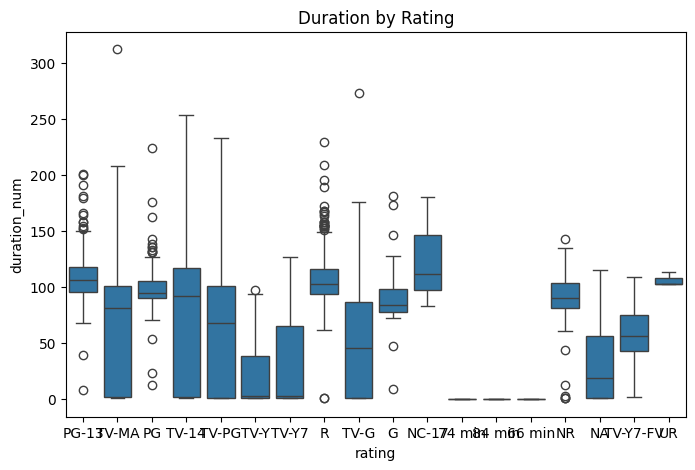

In [0]:
plt.figure(figsize=(8,5))
sns.boxplot(x='rating', y='duration_num', data=df)
plt.title("Duration by Rating")
plt.show()

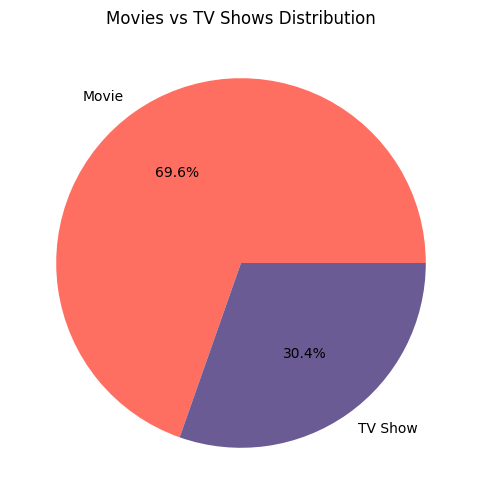

In [0]:
plt.figure(figsize=(6,6))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#FF6F61','#6B5B95'])
plt.title("Movies vs TV Shows Distribution")
plt.ylabel('')
plt.show()


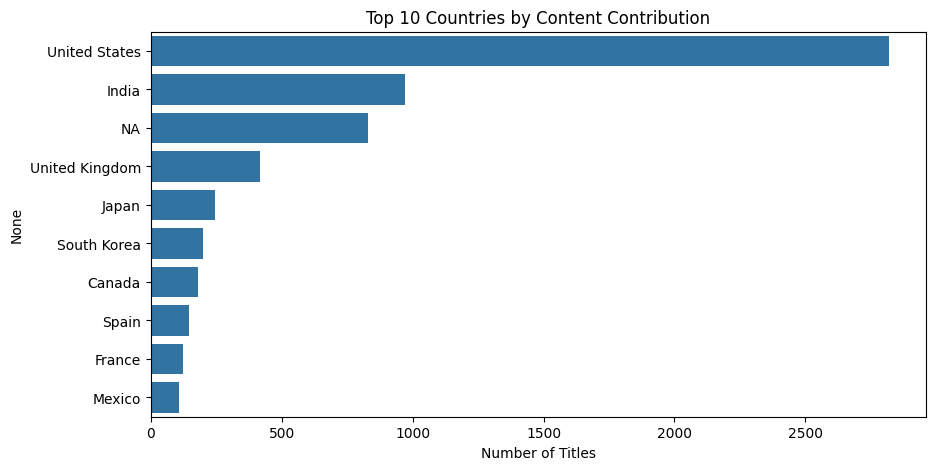

In [0]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Content Contribution")
plt.xlabel("Number of Titles")
plt.show()


rating   66 min  74 min  84 min   G  NA  ...  TV-PG  TV-Y  TV-Y7  TV-Y7-FV  UR
type                                     ...                                  
Movie         1       1       1  41   2  ...    540   131    139         5   3
TV Show       0       0       0   0   2  ...    323   176    195         1   0

[2 rows x 18 columns]


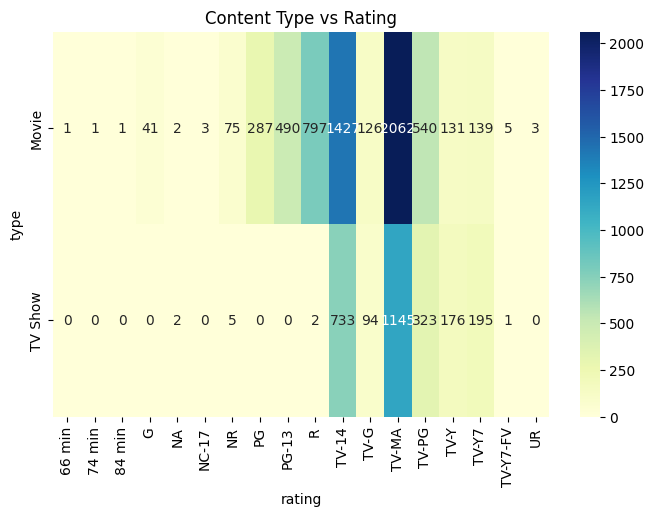

'Most Movies fall under TV-MA, followed by TV-14 and R ratings.\n\nMost TV Shows are also in the TV-MA and TV-14 categories.\n\nThis shows that Netflix’s catalog leans heavily toward mature content (TV-MA).\n\nVery few shows or movies are for kids (TV-Y, TV-G, etc.).'

In [0]:
ct = pd.crosstab(df['type'], df['rating'])
print(ct)
plt.figure(figsize=(8,5))
sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Content Type vs Rating")
plt.show()

"""Most Movies fall under TV-MA, followed by TV-14 and R ratings.

Most TV Shows are also in the TV-MA and TV-14 categories.

This shows that Netflix’s catalog leans heavily toward mature content (TV-MA).

Very few shows or movies are for kids (TV-Y, TV-G, etc.)."""

13/10/2025
